In [1]:
##run this cell to use the notebook

##it imports the modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss
from scipy.stats import norm
from scipy.optimize import curve_fit
import numpy as np
import math
from math import pi


#and defines important methods

def f2plot(file,cat,pts):
    #this function takes a file and turns it into a
    #given matrix for plotting reasons
    table=np.zeros([cat,pts])
    lines=file.readlines()
    c=0
    for line in lines:
        line = line.replace("\n","")
        data = line.split(' ')
        for i in range(len(data)):
            table[i][c] = float(data[i])
        c += 1
    file.close()
    return table
def cauchy(x,gamma,mu):
    y = (1./math.pi)*(gamma/(gamma**2 + (x-mu)**2))
    return y

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

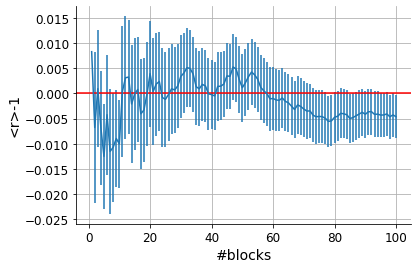

In [2]:
N=100
M=10000
L=int(M/N)
f=open("res1.dat","r")
data=f2plot(f,2,N)
X= ((np.arange(N))+1)

#let's plot!
plt.errorbar(X,(data[0]-1.),yerr=data[1])
plt.xlabel('#blocks')
plt.ylabel('<r>-1')
plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

We leave the prefactor $\frac{\pi}{2}$ alone, we can freely multiply by it. We now try to find a polinomial approximation of the integrand. This of course can be done using the following polinome:
$$ \cos(\pi x/2) \approx 1 - \frac{\pi^2}{8} x^2 + \frac{\pi^4}{384}x^4$$
We can treat it as a probability distribution $g(x)$ by normalizing it in the interval $[0,1]$:
$$\int_0^1 1 - \frac{\pi^2}{8} x^2 + \frac{\pi^4}{384}x^4 dx = 1 - \frac{\pi^2}{24} + \frac{\pi^4}{1920} \approx 0.6395$$
We now evaluate the integral
$$\int_0^1 \frac{p(x)f(x)}{g(x)} g(x) dx $$
Which is an average over the pdf $g(x)$ of the function $\frac{f(x)}{g(x)}$,since $p(x)$ is uniform, which is: 
$$ 0.6395 \frac{\cos(\frac{\pi x}{2})}{1 - \frac{\pi^2}{8} x^2 + \frac{\pi^4}{384}x^4}  $$

In [3]:
def g(x):
    norm= 0.6521838602632053
    return (1-(((pi*x)**2)/8.) +((pi*x)**4)/384. )/norm

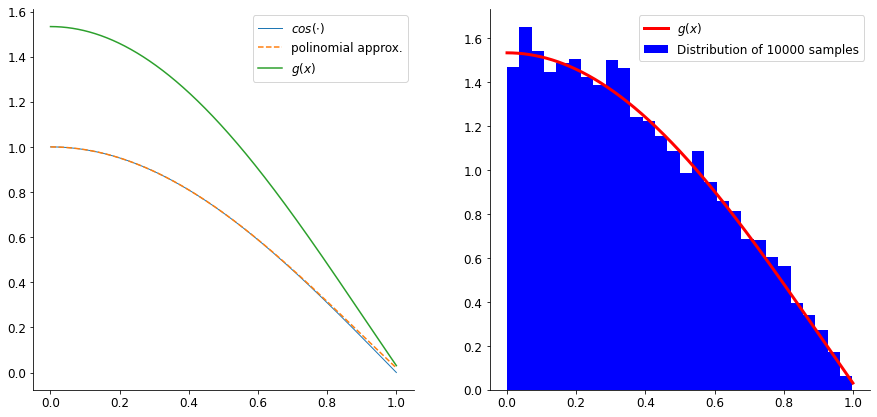

In [4]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
x=np.linspace(0,1,1000)
norm= 0.6521838602632053
y=  (1-(((pi*x)**2)/8.) +((pi*x)**4)/384. )
z=  (1-(((pi*x)**2)/8.) +((pi*x)**4)/384. )/norm
ax[0].plot(x,np.cos(pi*x/2.),linewidth=1,label='$cos(\cdot)$')
ax[0].plot(x,y,label='polinomial approx.',linestyle = 'dashed')
ax[0].plot(x,z,label='$g(x)$')
ax[0].legend()
f=open("imps.dat","r")
ax[1].plot(x,z,label='$g(x)$',linewidth=3.,color='red')
data=f2plot(f,1,10001)
ax[1].hist(data[0],density=True,bins="auto",color='blue',label='Distribution of 10000 samples')
ax[1].legend()
plt.show()

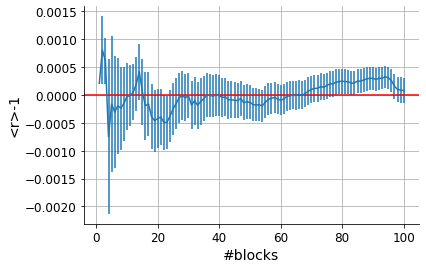

In [32]:
N=100
M=10000
L=int(M/N)
f=open("res2.dat","r")
data=f2plot(f,2,N)
#let's plot!
plt.errorbar(X,(data[0]-1.),yerr=data[1])
plt.xlabel('#blocks')
plt.ylabel('<r>-1')
plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

We find that:
$$ \sigma^2_{\sqrt{|\vec{r}|^2}} = \sigma^2_{|\vec{r}|^2} \frac{\partial \sqrt{|\vec{r}|^2}}{\partial |\vec{r}|^2}= \frac{\sigma^2_{|\vec{r}|^2}}{2 \sqrt{|\vec{r}|^2}}$$

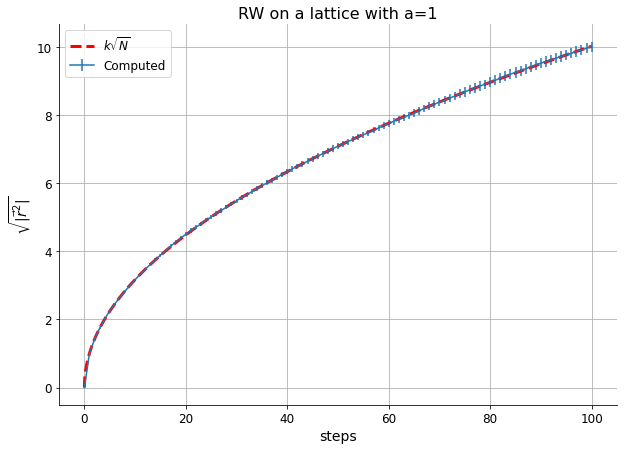

We have that :k=  1.002947113318593


In [78]:
N=101
M=10000
L=int(M/N)
f=open("r2disc.dat","r")
data=f2plot(f,3,N)

def f(x,k):
    return k*(x**0.5) 

#let's plot!
X=np.linspace(0,100,2000)
plt.figure(figsize=(10,7))
plt.errorbar(data[0],data[1],yerr=data[2],label='Computed')
plt.xlabel('steps')
plt.ylabel('$\sqrt{|\\vec{r}^2|}$')
k=(scipy.optimize.curve_fit(f, data[0], data[1])[0])
for i in range(len(X)):
    Y[i] = f(X[i],k[0])
plt.plot(X,Y,label='$k \sqrt{N}$',linewidth=3,color='red',linestyle='dashed')
plt.grid(True)
plt.title('RW on a lattice with a=1')
plt.legend(loc='upper left')
plt.show()
print("We have that :k= ",k[0])

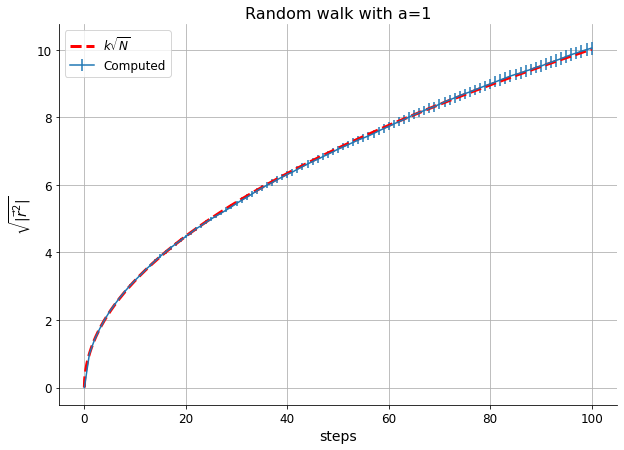

We have that :k=  1.0019992669112499


In [79]:
N=101
M=10000
L=int(M/N)
f=open("r2sphere.dat","r")
data=f2plot(f,3,N)

def f(x,k):
    return k*(x**0.5) 

#let's plot!
X=np.linspace(0,100,2000)
plt.figure(figsize=(10,7))
plt.errorbar(data[0],data[1],yerr=data[2],label='Computed')
plt.xlabel('steps')
plt.ylabel('$\sqrt{|\\vec{r}^2|}$')
k=(scipy.optimize.curve_fit(f, data[0], data[1])[0])
for i in range(len(X)):
    Y[i] = f(X[i],k[0])
plt.plot(X,Y,label='$k \sqrt{N}$',linewidth=3,color='red',linestyle='dashed')
plt.grid(True)
plt.title('Random walk with a=1')
plt.legend(loc='upper left')
plt.show()
print("We have that :k= ",k[0])

We comment that our results do indeed show a diffusive behaviour, that is, one where $$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}  \propto \sqrt{N}$$
In the case shown, the estimated proportionality constant is near 1.